In [60]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [61]:
# Loading the dataset
data = pd.read_csv("concatenated_data_v3.csv") ##TODO 
# change population dependence to percents
data.loc[:,"ACSTOTHH":"LESSHS"] = data.loc[:,"ACSTOTHH":"LESSHS"].div(data.loc[:,"ACSTOTPOP"], axis=0)
data = data.dropna()
# Drop specified columns
columns_to_drop = ['PM25', 'OZONE', 'DSLPM', 'CANCER', 'RESP']
data = data.drop(columns=columns_to_drop)

# Display the updated data DataFrame with the columns dropped
print(data.head())


  State                County  Operational  Shutdown  Potential  Any Landfill   
0    AK        Aleutians West          0.0       0.0        1.0           1.0  \
1    AK             Anchorage          1.0       0.0        1.0           1.0   
2    AK  Fairbanks North Star          0.0       0.0        1.0           1.0   
3    AK                Juneau          0.0       0.0        1.0           1.0   
4    AK       Kenai Peninsula          0.0       0.0        1.0           1.0   

   ACSTOTPOP  ACSTOTHH  MINORPOP  LOWINCOME  ...       PTRAF      PNPL   
0       5708  0.228802  0.768220   0.194289  ...    0.000000  0.040295  \
1     292090  0.366223  0.432617   0.213126  ...  633.067023  0.131820   
2      98455  0.367671  0.312468   0.203768  ...  185.155452  0.132946   
3      32099  0.401196  0.365525   0.157419  ...  238.886591  0.003056   
4      58809  0.370368  0.208216   0.271166  ...   46.424096  0.008310   

       PRMP     PTSDF       UST  PWDIS      AREALAND     AREAWATER  

In [62]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [63]:


# Prepare the data for training
X = data.loc[:, 'ACSTOTPOP':].values # Features
y = data.loc[:, 'Any Landfill'].values # Target variable (0 or 1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_clf.predict(X_test)
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.6970010341261634


In [64]:
# Importing required libraries

import shap

In [65]:
# _test_df = pd.DataFrame(X_test, columns=data.columns[1:])



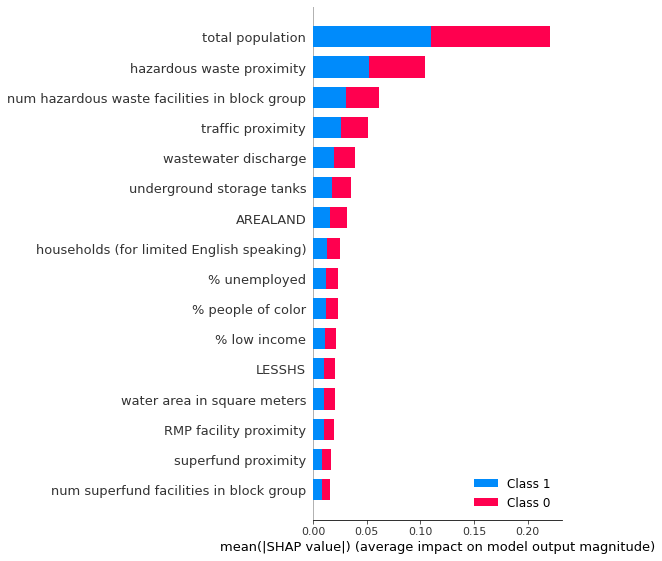

In [87]:
# import shap

# Explaining the predictions using SHAP values
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X_test)
feature_rename_dict = {
    "ACSTOTPOP": 'total population',
    "ACSTOTHH": 'households (for limited English speaking)',
    "MINORPOP": '% people of color',
    "LOWINCOME": '% low income',

    "UNEMPLOYED": '% unemployed',
    "LESSHSPCT": '% less than high school education',
    "PM25": 'particulate matter 2.5',
    "OZONE": 'ozone',
    "DSLPM": 'diesel particulate matter',
    "CANCER": 'air toxics cancer risk',
    "RESP": 'air toxics respiratory HI',
    "PTRAF": 'traffic proximity',
    "PNPL": 'superfund proximity',
    "PRMP": 'RMP facility proximity',
    "PTSDF": 'hazardous waste proximity',
    "UST": 'underground storage tanks',
    "PWDIS": 'wastewater discharge',
    "AREA": 'land area in square meters',
    "AREAWATER": 'water area in square meters',
    "NPL_CNT": 'num superfund facilities in block group',
    "TSDF_CNT": 'num hazardous waste facilities in block group',
}

# # Visualizing the SHAP values for a single prediction
# shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test.iloc[0])

# Visualizing the summary plot of the SHAP values , plot_type="bar"
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=data.loc[:, 'ACSTOTPOP':].rename(columns=feature_rename_dict).columns)

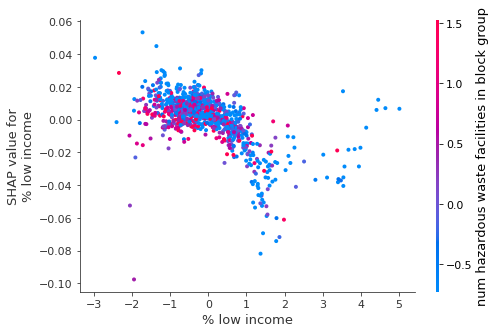

In [67]:
# shap_values_explainer= explainer(X_test)
# shap.plots.bar(shap_values_explainer)
# Visualizing the dependence plot of a single feature (e.g., 'particulate matter 2.5')
shap.dependence_plot('% low income', shap_values[1], X_test, feature_names=data.loc[:, 'ACSTOTPOP':].rename(columns=feature_rename_dict).columns)

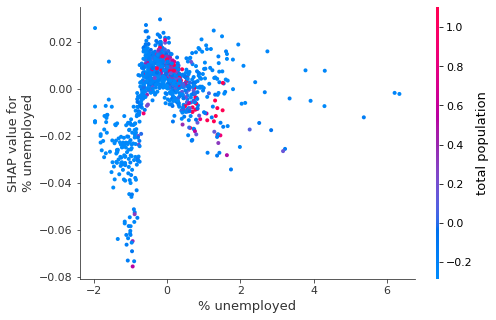

In [72]:
# shap.dependence_plot(shap_values, X_test, feature_names=data.loc[:, 'ACSTOTPOP':].rename(columns=feature_rename_dict).columns)
shap.dependence_plot('% unemployed', shap_values[1], X_test, feature_names=data.loc[:, 'ACSTOTPOP':].rename(columns=feature_rename_dict).columns)


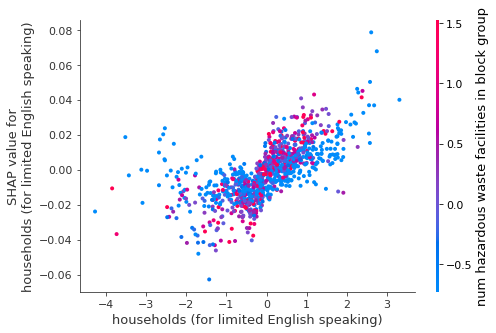

In [70]:
# shap.dependence_plot('particulate matter 2.5', shap_values[1], X_test, feature_names=data.loc[:, 'ACSTOTPOP':].rename(columns=feature_rename_dict).columns)
shap.dependence_plot('households (for limited English speaking)', shap_values[1], X_test, feature_names=data.loc[:, 'ACSTOTPOP':].rename(columns=feature_rename_dict).columns)

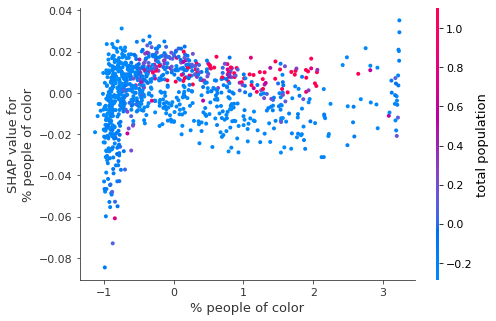

In [74]:
shap.dependence_plot('% people of color', shap_values[1], X_test, feature_names=data.loc[:, 'ACSTOTPOP':].rename(columns=feature_rename_dict).columns)
# # Calculate SHAP interaction values
# shap_interaction_values = explainer.shap_interaction_values(X_test)

# # Visualize interaction values between features (e.g., 'particulate matter 2.5' and 'ozone')
# shap.dependence_plot(('particulate matter 2.5', 'ozone'), shap_interaction_values[1], X_test, feature_names=data.loc[:, 'ACSTOTPOP':].rename(columns=feature_rename_dict).columns)


In [ ]:
# Visualizing the waterfall plot for a single prediction
# shap.waterfall_plot(explainer.expected_value[1], shap_values[1][0], feature_names=data.loc[:, 'ACSTOTPOP':].rename(columns=feature_rename_dict).columns)


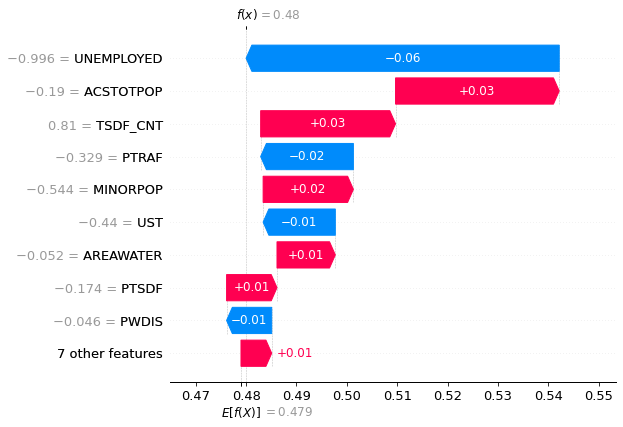

In [84]:

import matplotlib.pyplot as plt

# Explaining the predictions using SHAP values


# Choose an instance for which you want to visualize the waterfall plot
instance_index = 0  # Replace '0' with the index of the instance you'd like to analyze

# Select the appropriate SHAP values for the class you want to analyze
class_index = 1  # Replace '1' with the index of the class you'd like to analyze
selected_shap_values = shap_values[class_index]

# # Visualize the waterfall plot for the chosen instance
# shap.plots.waterfall(selected_shap_values[instance_index])
# Convert the numpy array of SHAP values to an Explanation object
selected_shap_values_explanation = shap.Explanation(values=selected_shap_values,
                                                     base_values=explainer.expected_value[class_index],
                                                     data=X_test,
                                                     feature_names=data.loc[:, 'ACSTOTPOP':].columns)

# Visualize the waterfall plot for the chosen instance

plt.rcParams['figure.facecolor'] = 'white'

shap.plots.waterfall(selected_shap_values_explanation[instance_index])

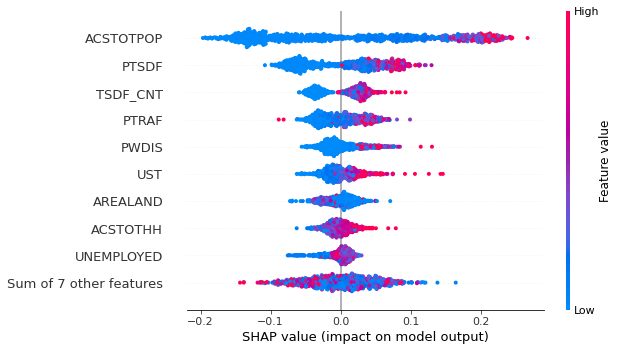

In [82]:
shap.plots.beeswarm(selected_shap_values_explanation)